# Lead Scoring

In [1288]:
%config InlineBackend.figure_format = 'retina'

In [1289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

### Inspecting

In [1290]:
df = pd.read_csv('Leads.csv')
df.to_pickle('init.pkl')

In [1291]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1292]:
df.shape

(9240, 37)

In [1293]:
df['Converted'].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

In [1294]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1296]:
for column in df.select_dtypes('object').columns:
    print(f"============= {column} =============")
    print(df[column].value_counts(normalize=True)[:5])

============= Prospect ID =============
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
Name: proportion, dtype: float64
============= Lead Origin =============
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
============= Lead Source =============
Lead Source
Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: proportion, dtype: float64
============= Do Not Email =============
Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64
============= Do Not Call =============
Do Not Call
No     0.99978

### Removing ID

In [1297]:
# Remove Identity columns as they do not have any prediction power (too unique)
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

### Replacing 'Select' Terms

In [1298]:
# The "Select" terms must be replaced from all columns (missing data)
df.replace('Select', np.nan, inplace=True)

### Columns with high Missing Values

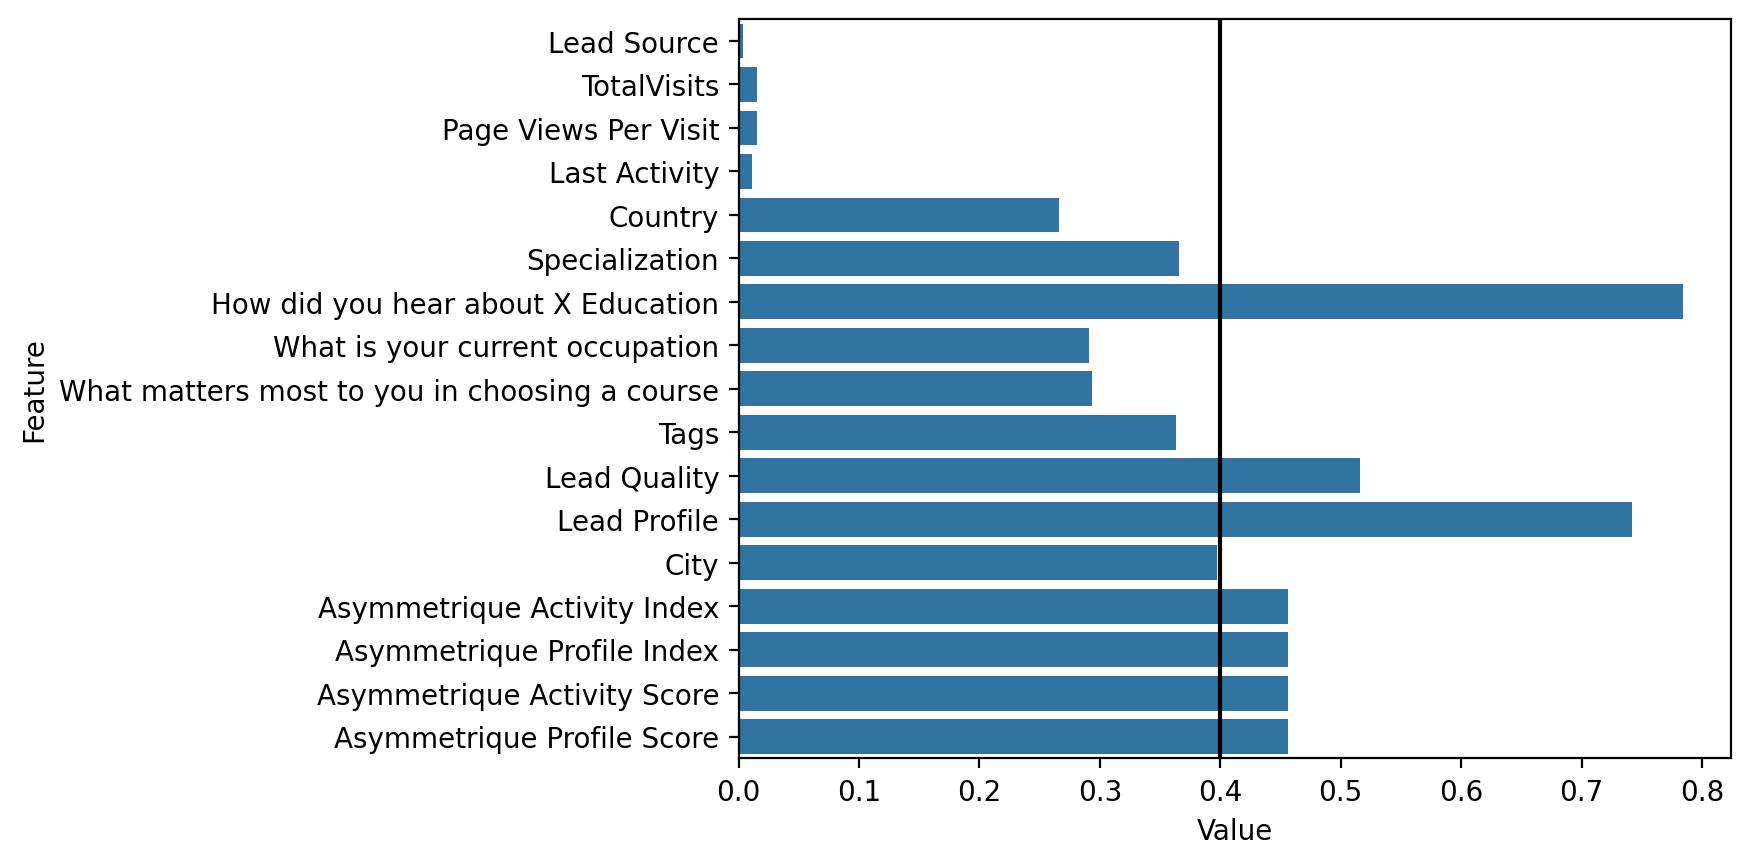

In [1299]:
# Check the number of nulls
NULL_COLUMN_THRESHOLD = 0.4

null_percent = df.isnull().sum() / df.shape[0] 
null_features = null_percent[null_percent > 0]

# Drop any columns with null values more than this%
df.drop(columns=null_percent[null_percent > NULL_COLUMN_THRESHOLD].index, inplace=True)

# Visualize.
null_features_df = null_features.reset_index()
null_features_df.columns = ['Feature', 'Value']
sns.barplot(x='Value', y='Feature', data=null_features_df, orient='h')

plt.axvline(NULL_COLUMN_THRESHOLD, color='k')
plt.show()

In [1300]:
df.to_pickle('cleaning_high_missing.pkl')

### Imputation

In [1301]:
df = pd.read_pickle('cleaning_high_missing.pkl')

In [1302]:
remaining = df.isnull().mean()
remaining[remaining > 0]

Lead Source                                      0.003896
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Tags                                             0.362879
City                                             0.397078
dtype: float64

#### Imputing Lead Source

In [1303]:
# If number of nulls is low then we can impute it.
df['Lead Source'].value_counts(normalize=True, dropna=False)[:5]

Lead Source
Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Name: proportion, dtype: float64

In [1304]:
# For 'Lead Source', we observe that Mode is Google. And very small fraction is NA. 
# If unknown, we can assume that they were redirected from Google.
# So we impute this information with the mode value (Google)
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])

#### Dropping Null rows

In [1305]:
# If number of nulls is low then we can impute it.
df['TotalVisits'].value_counts(normalize=True, dropna=False).loc[:5]

TotalVisits
0.0    0.236905
2.0    0.181818
3.0    0.141342
4.0    0.121212
5.0    0.084740
Name: proportion, dtype: float64

In [1306]:
df[df['TotalVisits'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 77 to 9087
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    137 non-null    object 
 1   Lead Source                                    137 non-null    object 
 2   Do Not Email                                   137 non-null    object 
 3   Do Not Call                                    137 non-null    object 
 4   Converted                                      137 non-null    int64  
 5   TotalVisits                                    0 non-null      float64
 6   Total Time Spent on Website                    137 non-null    int64  
 7   Page Views Per Visit                           0 non-null      float64
 8   Last Activity                                  34 non-null     object 
 9   Country                                        0 non-null

In [1307]:
# we observe that when this value is null, some other column values also tends to be null
# For example, Page Views Per Visit is always null, Country & City is null half the time, and Specialization is also null. 
# Last Activity also has many nul values.
# It is likely that the data is captured in a specific way, and there's an edge case where data is missed, which affects many other columns.
# It is best to drop these rows.

In [1308]:
df.dropna(subset=['TotalVisits'], inplace=True)

In [1309]:
remaining = df.isnull().mean()
remaining[remaining > 0]

Country                                          0.255300
Specialization                                   0.362957
What is your current occupation                  0.294738
What matters most to you in choosing a course    0.296825
Tags                                             0.366143
City                                             0.395474
dtype: float64

In [1310]:
df.to_pickle('cleaning_null_rows.pkl')

### Constant Columns

In [1311]:
df = pd.read_pickle("cleaning_null_rows.pkl")

In [1312]:
# Remove columns with all values constant.

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("removing", constant_cols)

removing ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [1313]:
df.drop(columns=constant_cols, inplace=True)

In [1314]:
df.to_pickle('cleaning_constant_removed.pkl')

### Binary Variables

In [1315]:
df = pd.read_pickle("cleaning_constant_removed.pkl")

In [1316]:
boolean_columns = [
    'Do Not Email', 'Do Not Call',
    'Search', 'Magazine', 'Newspaper Article', 
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 
    'Through Recommendations', 'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 'Get updates on DM Content', 
    'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
]

def yes_no_boolean(value):
    if isinstance(value, bool):
        # already converted.
        return value
    if value.lower() == 'yes':
        return True
    elif value.lower() == 'no':
        return False
    raise ValueError(f"Invalid value: {value}")

for column in boolean_columns:
    if column not in df.columns:
        # dropped before.
        continue
    df[column] = df[column].apply(yes_no_boolean).astype(bool)

In [1317]:
# ensure there is no other value except for True and False.
df['Converted'] = df['Converted'].astype(bool)

### Clubbing Categorical Values

In [ ]:
# dangerous
columns_with_other = [col for col in df.columns if df[col].apply(lambda x: 'other' in str(x).lower() if pd.notnull(x) else False).any()]
columns_with_other

In [ ]:
for column in columns_with_other:
    print(f"=========== {column} ===========")
    print(df[column].value_counts())

In [ ]:
# replace Other for consisteny.
for col in ['What is your current occupation', 'What matters most to you in choosing a course']:
    df[col] = df[col].str.replace('Other', 'others', case=False)

df['City'] = df['City'].str.replace('Other Cities', 'others', case=False)

In [ ]:
# club less common values together into one category.
# also include NA.

In [ ]:
threshold = 0.95

for column in df.select_dtypes(include=['object']).columns:
# for column in ['Country']:
    # print(f"============= {column} ===============")
    value_counts = df[column].value_counts(normalize=True)
    cumulative_counts = value_counts.cumsum()
    less_common_values = cumulative_counts[cumulative_counts > threshold].index.to_list()

    first_category = value_counts.index[0]
    if cumulative_counts[first_category] > threshold:
        less_common_values.remove(first_category)

    # print("less_common_values", less_common_values)

    def replacer(value):
        if pd.isna(value):
            return value
        if value not in less_common_values:
            return value
        return 'others'
    
    df[column] = df[column].apply(replacer)
    print(f"Number of uniques for '{column}' is", df[column].nunique())

### Low Variation

In [ ]:
THRESHOLD_LOW_VAR = 0.99

# Check if a vast majority values are same, and drop these column, it is not useful.
low_variation_columns = []
printable = []
for column in df.columns:

    value_counts = df[column].value_counts(normalize=True)
    cumulative_counts = value_counts.cumsum()

    first_category = value_counts.index[0]    
    
    if cumulative_counts[first_category] > THRESHOLD_LOW_VAR:
        printable.append({
            'name': column,
            'type': df.dtypes[column],
            'dominant_value': first_category,
            'percent': 100 * cumulative_counts[first_category],
        })
        # print(f"'{column}' ({type()}) has dominant '{first_category}' ", round(cumulative_counts[first_category], 4)) 
        low_variation_columns.append(column)
pd.DataFrame(printable)

In [ ]:
df.drop(columns=low_variation_columns, inplace=True)

In [ ]:
df.to_pickle('cleaning_low_variation_removed.pkl')

### Null Row Removal

In [ ]:
df['Converted'].value_counts()

In [ ]:
# Logistic Regression requires all non-null rows, so we drop any rows with any null column value
rows_to_be_removed = df.isnull().any(axis=1)
print("removing", sum(rows_to_be_removed))
df = df[~rows_to_be_removed]

In [ ]:
# still balanced.
df['Converted'].value_counts()

In [ ]:
# Fraction of rows retained after cleanup.
len(df) / len(pd.read_pickle('init.pkl'))

In [ ]:
df.to_pickle('null_row_removed.pkl')

## Outlier Treatment

In [ ]:
df = pd.read_pickle('null_row_removed.pkl')

In [ ]:
def get_limits(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound
df.select_dtypes(include=[float, int]).columns

In [ ]:
lower_bound, upper_bound = get_limits(df['TotalVisits'])
(df['TotalVisits'] < lower_bound).sum(), (df['TotalVisits'] > upper_bound).sum()

In [ ]:
# repalcing these with the upper limit because it is unlikely that someone visited so often, and might be an issue with data capturing algorithm
df['TotalVisits'].mask(df['TotalVisits'] > upper_bound, upper_bound, inplace=True)

In [ ]:
# No outliers found
lower_bound, upper_bound = get_limits(df['Total Time Spent on Website'])
(df['Total Time Spent on Website'] < lower_bound).sum(), (df['Total Time Spent on Website'] > upper_bound).sum()

In [ ]:
TARGET_COLUMN = 'Page Views Per Visit'

lower_bound, upper_bound = get_limits(df[TARGET_COLUMN])
(df[TARGET_COLUMN] < lower_bound).sum(), (df[TARGET_COLUMN] > upper_bound).sum()

In [ ]:
# repalcing these with the upper limit because it is unlikely that someone visited so often, and might be an issue with data capturing algorithm
df['Page Views Per Visit'].mask(df['Page Views Per Visit'] > upper_bound, upper_bound, inplace=True)

In [ ]:
df.to_pickle('cleaning_final.pkl')

In [ ]:
df.columns

## EDA

In [ ]:
df = pd.read_pickle('cleaning_final.pkl')

In [ ]:
# Here we observe many graphs and their patterns.

### Univariate Analysis

In [ ]:
df['Do Not Email'].astype(str)

In [ ]:
for column in df.select_dtypes(exclude=[float, int]):
    df_col = df[column]
    if df_col.dtype == bool:
        df_col = df_col.astype(str)
    plt.figure()
    sns.displot(df_col)
    plt.show()

In [ ]:
for column in df.select_dtypes(include=[float, int]):
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.show()

### Bivariate Analysis

In [ ]:
# All categorical var in the dataset
df_categorical = df.select_dtypes(exclude=['float64','datetime64','int64', bool])
df_categorical.head()

#### Side By Side Boxplots

In [ ]:

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Converted', y=column, data=df, palette='hsv')
    plt.title(f'Distribution of {column} by Converted status')
    plt.show()

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxenplot(x='Converted', y=column, data=df, palette='hsv')
    plt.title(f'Distribution of {column} by Converted status')
    plt.show()

In [ ]:
for column in df.select_dtypes(include=['object', 'category', 'bool']).columns:
    if column == 'Converted':
        continue
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='Converted', data=df, estimator=np.mean, palette='hsv')
    plt.title(f'Average Conversion - {column}')
    plt.xticks(rotation=45)
    plt.show()


We observe that it is hard to guess the conversion rate among any of these categories.

### Checking Correlation between Features

In [ ]:
df_numeric = df.select_dtypes(include=['float', 'int'])
df_numeric["Converted"] = df["Converted"]
sns.pairplot(df_numeric)
plt.show()

In [ ]:
corr = df_numeric.corr()
corr

In [ ]:
sns.heatmap(corr, square=True, annot=True)

We observe that TotalVisits and PageViews Per Visit ahve some correlation, which is natural.

## Modelling

In [ ]:
import pandas as pd

In [ ]:
# pick last element from the dataframes array.
df_model = pd.read_pickle('cleaning_final.pkl')

### Scaling

In [ ]:
df_model.select_dtypes(exclude=['object', 'bool']).columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary and categorical
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

df_model[num_vars] = scaler.fit_transform(df_model[num_vars])


In [ ]:
df_model[num_vars].head()

In [ ]:
df_model.to_pickle('model_scale.pkl')

### Dummy Columns

In [ ]:
df_model.select_dtypes('object').columns

In [ ]:
# create dummies
cat_columns = list(set(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity']).intersection(df_model.columns))

df_model = pd.get_dummies(df_model, drop_first=True, columns=cat_columns)

for col in df_model.columns:
    if df_model[col].dtype == 'bool':
        df_model[col] = df_model[col].astype(int)


In [ ]:
df_model.head()

In [ ]:
df_model.to_pickle("model_dummy.pkl")

### Train Test Split

In [ ]:
df_model = pd.read_pickle('model_dummy.pkl')

In [ ]:
df_model.shape

In [ ]:
TRAIN_SIZE = 0.8
RANDOM_STATE = 100
Y_LABEL = 'Converted'

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_model, train_size = 0.8, test_size = 1-TRAIN_SIZE, random_state = RANDOM_STATE)

y_train = df_train[Y_LABEL]
X_train = df_train.drop(columns=Y_LABEL)
y_test = df_test[Y_LABEL]
X_test = df_test.drop(columns=Y_LABEL)

### Basic Model

In [ ]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, predictions_train))
print(classification_report(y_test, predictions_test))

In [ ]:
# Even without using RFE, this preliminary model is quite strong.

### RFE

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
model.fit(X_train_rfe, y_train)
predictions_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, predictions_rfe)
print(f"Model Accuracy with RFE: {accuracy_rfe}")

In [ ]:
X_train.columns[rfe.support_]

In [ ]:
# Calculate the VIFs for the new model
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X, y):
    X = sm.add_constant(X) #Adding the constant
    # lm = sm.Logit(y, X).fit() # fitting the model
    lm = sm.GLM(y, X, family = sm.families.Binomial()).fit()
    return lm

def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### Removing high p-value

In [ ]:
X_train_new = X_train[X_train.columns[rfe.support_]]
lm = build_model(X_train_new, y_train)
lm.summary()

In [ ]:
# drop due to high p-value
X_train_new.drop(['Tags_Not doing further education'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

In [ ]:
X_train_new.drop(['Tags_Lost to EINS'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

In [ ]:
X_train_new.drop(['Lead Source_others'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

In [ ]:
X_train_new.drop(['Last Notable Activity_Modified'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

### Checking VIF

In [ ]:
check_VIF(X_train_new)

Stop iteration since all VIF are below 5. This is the final model

### Evaluation

In [ ]:
X_test = sm.add_constant(df_test)

X_test = X_test[lm.model.exog_names]

y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(sm.add_constant(X_train_new))

In [ ]:
# These y_train_pred and y_test_pred values are essentially probability of lead conversion.

In [ ]:
y_train_pred_df = pd.DataFrame({
    'Converted': y_train.values, 
    'Probability': y_train_pred}
)
y_train_pred_df.head()

In [ ]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_df['Prediction'] = y_train_pred_df['Probability'].apply(lambda x: round(x))
y_train_pred_df.head()

In [ ]:
# Creating confusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Prediction'] )
confusion

In [ ]:
print('Model accuracy:', round(metrics.accuracy_score(y_train_pred_df['Converted'], y_train_pred_df['Prediction']), 4) * 100, '%')

In [ ]:
# Not converted
TN, FP = confusion[0,:]

# Yes Converted
FN, TP = confusion[1,:]

In [ ]:
sensitivity = round(TP/(TP+FN), 4) * 100
print('Model sensitivity is', sensitivity, '%')

specificity = round(TN/(TN+FP), 4) * 100
print('Model specificity is', specificity, '%')

#### Confusion Matrix (Train)

In [ ]:
# also confirmed using classification report
print(classification_report(y_train, (y_train_pred > 0.5)))

#### Confusion Matrix (Test)

In [ ]:
print(classification_report(y_test, (y_test_pred > 0.5)))

### ROC Curve


In [ ]:
# We can find more optimal threshold rather than 0.5

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
draw_roc(y_train_pred_df['Converted'], y_train_pred_df['Probability'])

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df['Probability'] > i )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

In [ ]:
# Plotting the accuracy, sensitivity, specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.3, color='r', linestyle='--')  # Adds a red dashed vertical line
plt.show()

The optimal point appears to be close to 0.3

In [ ]:
THRESHOLD = 0.3
y_train_pred_df['final_predicted'] = y_train_pred_df['Probability'].map( lambda x: 1 if x > THRESHOLD else 0)
y_train_pred_df.head()

In [ ]:
print(classification_report(y_train, (y_train_pred > THRESHOLD)))
print(classification_report(y_test, (y_test_pred > THRESHOLD)))

Now we observe that training accuracy, sensitivty and specificity are all 94%, while that of test is close to 92%

### Predictions

In [ ]:
X_test = sm.add_constant(df_test)

X_test = X_test[lm.model.exog_names]

y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(sm.add_constant(X_train_new))

In [ ]:
y_test_pred_df = pd.DataFrame({
    'Converted': y_test.values, 
    'Probability': y_test_pred}
)
y_test_pred_df.head()

In [ ]:
# Substituting 0 or 1 with the cut off as THRESHOLD
y_test_pred_df['Prediction'] = y_test_pred_df['Probability'].apply(lambda x: int(x > THRESHOLD) )
y_test_pred_df['Score'] = y_test_pred_df['Probability'] * 100
y_test_pred_df.head()

In [ ]:
print('Test model accuracy is', round(metrics.accuracy_score(y_test_pred_df['Converted'], y_test_pred_df['Prediction']), 4) * 100, '%')

In [ ]:
# Same as before, just kept here for completition of this section.
print(classification_report(y_test, (y_test_pred > THRESHOLD)))